In [34]:
import numpy as np
import pandas as pd
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lemmatizer = WordNetLemmatizer()

In [3]:
corpus = {
    'id': [],
    'date': [],
    'doc': []
}
with open('./cnnhealth.txt', mode='r') as f:
    for line in f.readlines():
        data = line.rstrip().split('|')
        corpus['id'].append(data[0])
        corpus['date'].append(data[1])
        corpus['doc'].append(data[2])
    f.close()

In [4]:
len(corpus['doc'])

4061

In [5]:
with open('./bbchealth.txt', mode='r') as f:
    for line in f.readlines():
        data = line.rstrip().split('|')
        corpus['id'].append(data[0])
        corpus['date'].append(data[1])
        corpus['doc'].append(data[2])
    f.close()

In [6]:
len(corpus['doc'])

7990

In [7]:
with open('./nytimeshealth.txt', mode='r') as f:
    for line in f.readlines():
        data = line.rstrip().split('|')
        corpus['id'].append(data[0])
        corpus['date'].append(data[1])
        corpus['doc'].append(data[2])
    f.close()

In [8]:
len(corpus['doc'])

14235

In [9]:
with open('./cbchealth.txt', mode='r') as f:
    for line in f.readlines():
        data = line.rstrip().split('|')
        corpus['id'].append(data[0])
        corpus['date'].append(data[1])
        corpus['doc'].append(data[2])
    f.close()

In [10]:
len(corpus['doc'])

17976

In [11]:
with open('./everydayhealth.txt', mode='r') as f:
    for line in f.readlines():
        data = line.rstrip().split('|')
        corpus['id'].append(data[0])
        corpus['date'].append(data[1])
        corpus['doc'].append(data[2])
    f.close()

In [12]:
len(corpus['doc'])

21215

### Text Preprocessing

In [13]:
def cleanDoc(doc) -> str:
    newDoc = doc.lower().rstrip()
    newDoc = re.sub(r'\s(https|http)[:/\d\w.]*', '', newDoc) # Remove links
    newDoc = re.sub(r'\s(@|#)[\w\d_]+', '', newDoc) # Remove Tags etc
    return newDoc

In [14]:
cleanDocs = [cleanDoc(x) for x in corpus['doc']]

In [15]:
filterWords = ['us']
def getLemmatizedSentences(doc):
    return ' '.join([lemmatizer.lemmatize(x) if x not in filterWords else x for x in word_tokenize(doc) if x not in string.punctuation])
    

In [16]:
lemmatizedSentences = (getLemmatizedSentences(x) for x in cleanDocs)

### TF-IDF - Sparse word matrix

In [17]:
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
X = tfidf.fit_transform(lemmatizedSentences)

In [19]:
X.shape

(21215, 16637)

### Clustering - KMeans

In [20]:
K = 5

In [21]:
model = KMeans(n_clusters=K, init='k-means++', max_iter=100)

In [22]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Centroids

In [23]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
tfidf.strip_accents

In [24]:
for i in range(K):
    print(f"\n### Cluster {i} ####")
    for ind in order_centroids[i, :10]:
        print(terms[ind])


### Cluster 0 ####
rt
amp
health
food
story
say
people
great
love
good

### Cluster 1 ####
ebola
outbreak
leone
liberia
cmp
rss
sierra
africa
patient
case

### Cluster 2 ####
health
cancer
food
cmp
rss
doctor
risk
life
say
drug

### Cluster 3 ####
new
age
old
blog
health
study
york
care
drug
say

### Cluster 4 ####
video
ebola
nh
health
cancer
help
child
care
mental
uk


In [25]:
X.shape

(21215, 16637)

In [26]:
class_labels = np.unique(model.labels_)

In [27]:
class_labels

array([0, 1, 2, 3, 4], dtype=int32)

In [28]:
svd = TruncatedSVD(n_components=2).fit_transform(X)

In [29]:
svd

array([[ 6.19548233e-02, -1.20369501e-02],
       [ 5.59619352e-02, -2.43094694e-02],
       [ 5.67304910e-02, -1.34353224e-02],
       ...,
       [ 9.04641246e-05, -4.97297194e-05],
       [ 2.07753613e-02, -6.46237230e-03],
       [ 3.63902251e-02, -9.28542507e-03]])

In [30]:
len(svd[:,1])

21215

In [31]:
len(svd[:,0])

21215

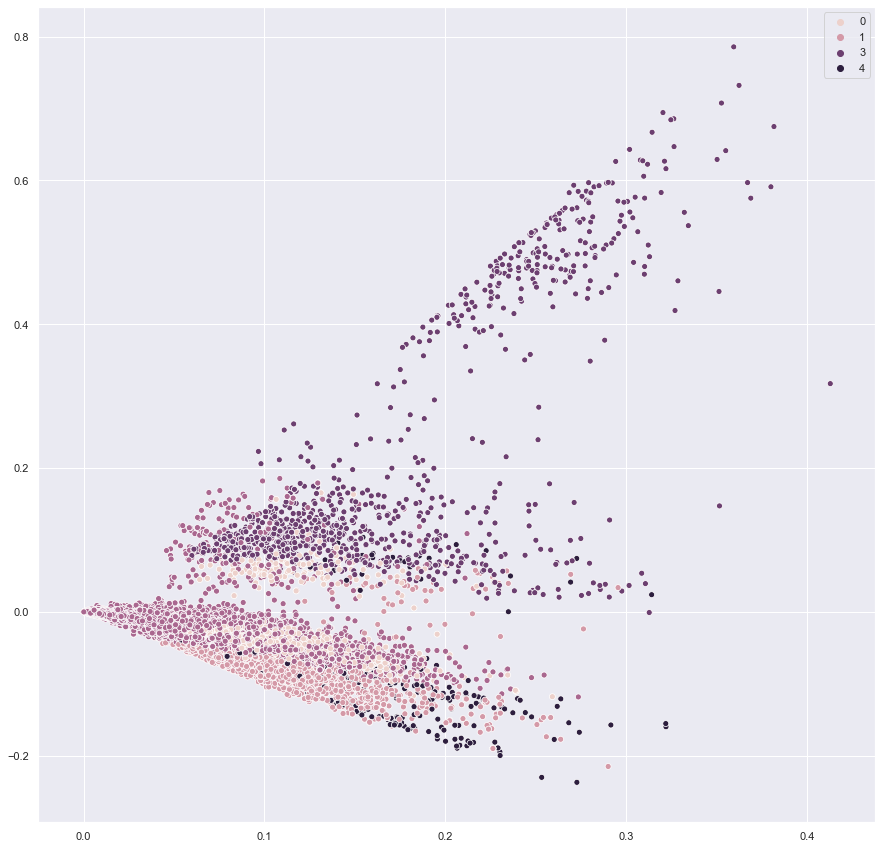

In [44]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.scatterplot(x=svd[:,0], y=svd[:,1], hue=model.labels_)

### T-SNE Visualization

In [36]:
partial_manifolding = TruncatedSVD(n_components=50).fit_transform(X)

In [37]:
X_embedding = TSNE(n_components=2).fit_transform(partial_manifolding)

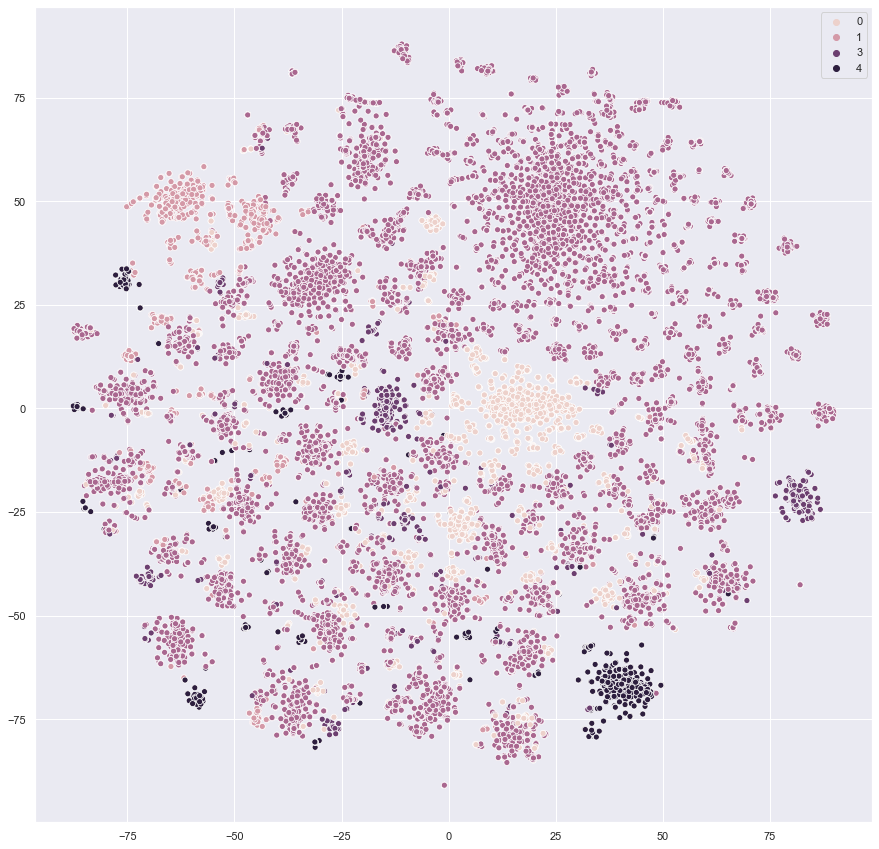

In [41]:
sns.set(rc={'figure.figsize':(15,15)})
ax_embedding = sns.scatterplot(x=X_embedding[:,0], y=X_embedding[:,1], hue=model.labels_)

### Finding Right Number of K using elbow method

I see there are two methods of determining K for clusters; elbow and silhouette. Since I have only studied elbow method only I have done only that, but as you can see the elbow method doesn't help with determining K hence I have only used K which looked like it separated points somewhat reasonably

In [35]:
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

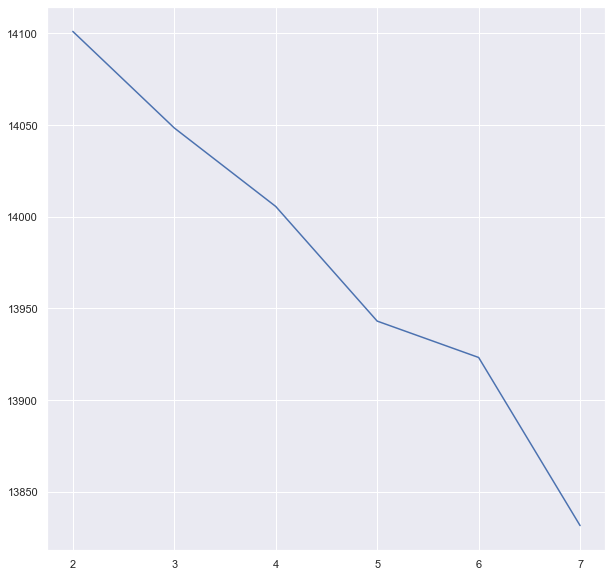

In [84]:
x, y = [], []
for k in range(2, 8):
    model = KMeans(n_clusters=k)
    model.fit(X)
    x.append(k)
    y.append(model.inertia_)

elbow = plt.plot(x, y)